# Modelling Dataset with Random Forest Classifier

## Import Libraries

In [40]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

## Data Loading

**Read Dataset**

In [ ]:
df = pd.read_csv('health_dataset.csv')
X = df.drop(columns=['Stress_level'])
y = df['Stress_level']

## Explarotary Data

**Check Columns Correlation**

In [11]:
# Combine X and y for correlation calculation
df_numeric = pd.concat([X, y], axis=1)

# Compute correlation of numeric features with Stress_level
correlation_with_stress = df_numeric.corr(numeric_only=True)['Stress_level'].drop('Stress_level')

# Optional: sort by correlation strength
correlation_with_stress = correlation_with_stress.sort_values(ascending=False)

# Show the result
print(correlation_with_stress)

Mental_health_state           0.213799
Gen_health_state              0.188130
Pain_status                   0.113329
Sense_belonging               0.099617
Gender                        0.063026
Food_security                 0.056955
Health_region_ grouped        0.056507
Province                      0.056431
Total_income                  0.053050
High_BP                       0.051224
Cardiovascular_con            0.049663
Household                     0.048720
Edu_level                     0.048247
Respiratory_chronic_con       0.046219
Musculoskeletal_con           0.042428
Diabetic                      0.040278
Insurance_cover               0.020803
BMI_12_17                     0.019714
Fruit_veg_con                 0.019651
Health_utility_indx           0.019321
Act_improve_health            0.016839
Cannabies_use                 0.015307
Aboriginal_identity           0.010009
BMI_18_above                  0.009204
Physical_vigorous_act_time    0.008916
Other_physical_act_time  

**Check Column mutual information to Target Column**

In [12]:
# Hitung mutual information
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

# Buat DataFrame untuk skor dan urutkan
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

# Tampilkan 20 fitur teratas untuk kemudian difilter yang cocok untuk pertanyaan
mi_df

,Feature,MI Score
12,Work_stress,0.124750
10,Life_satisfaction,0.071693
11,Mental_health_state,0.066109
6,Age,0.051208
7,Worked_job_business,0.050194
40,Work_hours,0.046901
41,working_status,0.044012
22,Mood_disorder,0.029280
47,Income_source,0.025910
23,Anxiety_disorder,0.024591


**Check Dataset Charateristics**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108142 entries, 0 to 108251
Data columns (total 50 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ADM_RNO1                    108142 non-null  int64  
 1   Province                    108142 non-null  int64  
 2   Health_region_ grouped      108142 non-null  int64  
 3   Gender                      108142 non-null  int64  
 4   Marital_status              108142 non-null  int64  
 5   Household                   108142 non-null  int64  
 6   Age                         108142 non-null  int64  
 7   Worked_job_business         108142 non-null  int64  
 8   Edu_level                   108142 non-null  int64  
 9   Gen_health_state            108142 non-null  int64  
 10  Life_satisfaction           108142 non-null  int64  
 11  Mental_health_state         108142 non-null  int64  
 12  Stress_level                108142 non-null  int64  
 13  Work_stress        

## Data Preparations

**Feature Selection based correlation and relevance**

In [84]:
selected_features = [
'Mental_health_state', 
'Gen_health_state',
'Pain_status', 
'Sense_belonging', 
'Edu_level',
'Work_stress', 
'Act_improve_health',
'Mood_disorder',  
'Stress_level'
]
# Menampilkan unique values dari setiap fitur
for col in selected_features:
    if col in df.columns:
        print(f"\n📌 Kolom: {col}")
        print(df[col].unique())
    else:
        print(f"\n❌ Kolom '{col}' tidak ditemukan dalam DataFrame")


📌 Kolom: Mental_health_state
[3 5 2 1 4 9 7 8]

📌 Kolom: Gen_health_state
[3 2 5 1 4 7 8]

📌 Kolom: Pain_status
[2 1 9]

📌 Kolom: Sense_belonging
[2 3 1 4 9 7 8]

📌 Kolom: Edu_level
[3 2 1 9]

📌 Kolom: Work_stress
[2 6 4 3 7 1 5 9 8]

📌 Kolom: Act_improve_health
[6 2 1 9 7 8]

📌 Kolom: Mood_disorder
[2 1 7 8]

📌 Kolom: Stress_level
[2 3 4 1 5 7 8]


**Membersihkan nama nama kolom**

In [85]:
# Bersihkan spasi di nama kolom
df.columns = df.columns.str.strip()
selected_features = [col.strip() for col in selected_features]

# Ambil hanya kolom yang dipilih
df_filtered = df[selected_features]

**Remove Invalid Answer based on Dictionary**

In [86]:
# Daftar nilai yang harus dihapus untuk setiap kolom
remove_conditions = {
    'Edu_level': [9],
    'Gen_health_state': [7, 8],
    'Mental_health_state': [7, 8, 9],
    'Work_stress': [6, 7, 8, 9],
    'Sense_belonging': [7, 8, 9],
    'Pain_status': [9],
    'Act_improve_health': [6, 7, 8],
    'Mood_disorder':[7, 8],
    'Stress_level': [7, 8]
}

# Salin DataFrame agar data asli tidak berubah (opsional)
df_cleaned = df_filtered.copy()

# Iterasi untuk setiap kondisi penghapusan
for col, invalid_values in remove_conditions.items():
    if col in df_cleaned.columns:
        df_cleaned = df_cleaned[~df_cleaned[col].isin(invalid_values)]
    else:
        print(f"❌ Kolom '{col}' tidak ditemukan dalam DataFrame")

# Menampilkan hasil setelah filter
print("✅ Jumlah baris setelah penghapusan:", len(df_cleaned))

✅ Jumlah baris setelah penghapusan: 9379


**Checking Data and Column**

In [87]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9379 entries, 12 to 108245
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Mental_health_state  9379 non-null   int64
 1   Gen_health_state     9379 non-null   int64
 2   Pain_status          9379 non-null   int64
 3   Sense_belonging      9379 non-null   int64
 4   Edu_level            9379 non-null   int64
 5   Work_stress          9379 non-null   int64
 6   Act_improve_health   9379 non-null   int64
 7   Mood_disorder        9379 non-null   int64
 8   Stress_level         9379 non-null   int64
dtypes: int64(9)
memory usage: 732.7 KB


**Seperate Feature and Label**

In [88]:
X = df_cleaned.drop('Stress_level', axis=1)
y = df_cleaned['Stress_level']
selected_features = X.columns.tolist()

**Normalize Numeric Values**

In [89]:
# Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Split Train Test with 80:20 Ratio**

In [90]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

**Train Model**

In [91]:
# Random Forest Model
model = RandomForestClassifier(n_estimators=140, max_depth=7, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

**Model Evaluation**

Accuracy: 0.5714285714285714

Classification Report:
              precision    recall  f1-score   support

           1       0.57      0.15      0.24       170
           2       0.50      0.33      0.40       362
           3       0.59      0.72      0.65       801
           4       0.57      0.72      0.63       489
           5       0.33      0.02      0.04        54

    accuracy                           0.57      1876
   macro avg       0.51      0.39      0.39      1876
weighted avg       0.56      0.57      0.54      1876



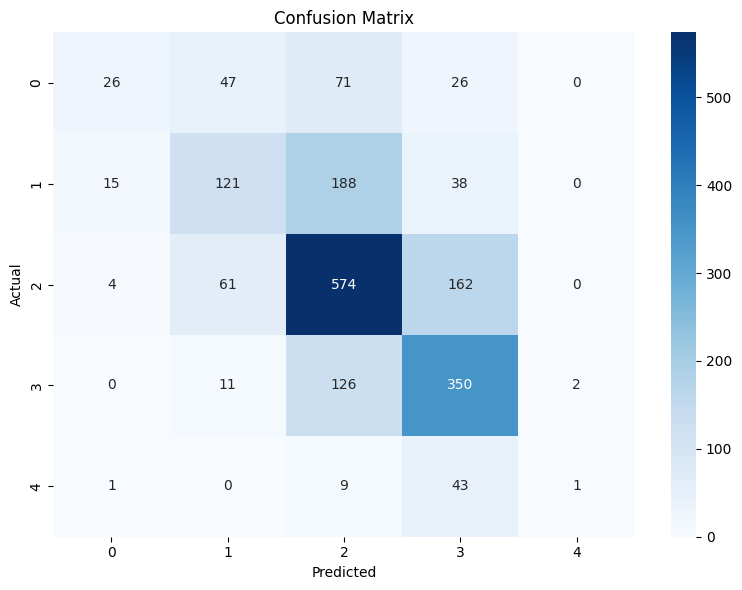

In [92]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

**Feature Importances of Model**

C:\Users\itzir\AppData\Local\Temp\ipykernel_6256\3298974315.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


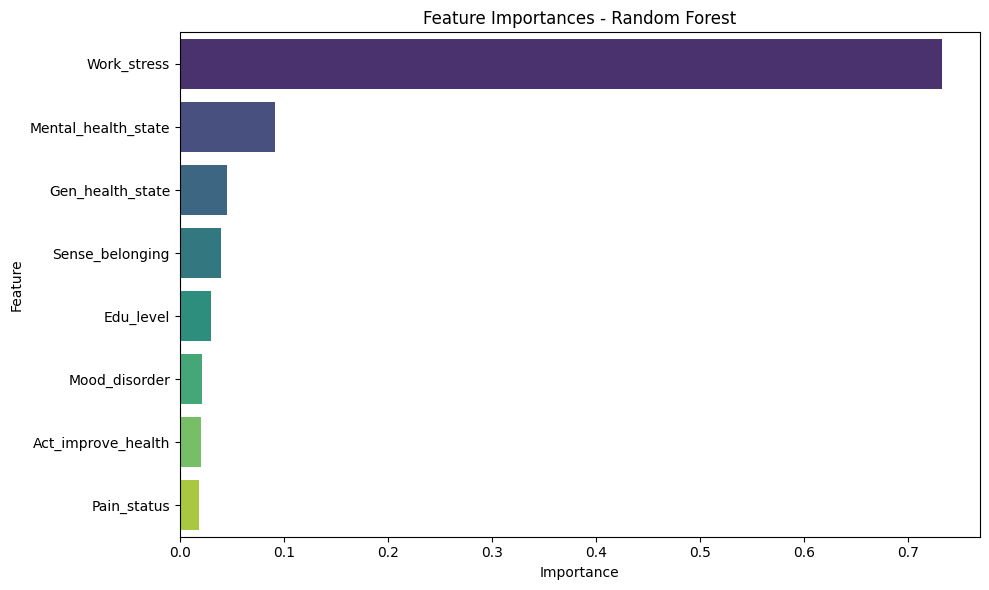

In [93]:
importances = model.feature_importances_
feature_names = X.columns  

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances - Random Forest')
plt.tight_layout()
plt.show()

In [ ]:
joblib.dump({
    'model': model,
    'scaler': scaler,
    'features': selected_features
}, 'rf_health_model.pkl')

['health_model.pkl']

In [95]:
model_data = joblib.load('health_model.pkl')
model = model_data['model']
scaler = model_data['scaler']
selected_features = model_data['features']

In [ ]:
test_data = pd.DataFrame([
    {
        'Mental_health_state': 2,
        'Gen_health_state': 3,
        'Pain_status': 1,
        'Sense_belonging': 4,
        'Edu_level': 2,
        'Work_stress': 3,
        'Act_improve_health': 1,
        'Mood_disorder': 1
    },
    {
        'Mental_health_state': 4,
        'Gen_health_state': 2,
        'Pain_status': 3,
        'Sense_belonging': 2,
        'Edu_level': 3,
        'Work_stress': 4,
        'Act_improve_health': 0,
        'Mood_disorder': 1
    },
    {
        'Mental_health_state': 1,
        'Gen_health_state': 4,
        'Pain_status': 1,
        'Sense_belonging': 5,
        'Edu_level': 1,
        'Work_stress': 2,
        'Act_improve_health': 1,
        'Mood_disorder': 1
    }
])

In [97]:
# 3. Ambil hanya kolom yang diperlukan
X = test_data[selected_features]

# 4. Scaling, lalu konversi kembali ke DataFrame agar nama kolom tetap ada
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns=selected_features)

# 5. Prediksi label stress level
predicted_labels = model.predict(X_scaled)

# 6. (Opsional) Probabilitas setiap kelas
probs = model.predict_proba(X_scaled)

# 7. Output hasil prediksi
for i, label in enumerate(predicted_labels):
    print(f"Data ke-{i+1}: Prediksi Stress Level = {label}, Probabilitas = {dict(zip(model.classes_, probs[i]))}")

Data ke-1: Prediksi Stress Level = 3, Probabilitas = {1: 0.09629451344188271, 2: 0.14102693502069488, 3: 0.43498370848035334, 4: 0.30560439647212545, 5: 0.022090446584943583}
Data ke-2: Prediksi Stress Level = 4, Probabilitas = {1: 0.008710834484386143, 2: 0.030122150999655137, 3: 0.2690168830187251, 4: 0.6250437789470764, 5: 0.06710635255015718}
Data ke-3: Prediksi Stress Level = 1, Probabilitas = {1: 0.3033543994219503, 2: 0.19279110399468058, 3: 0.23468462122334902, 4: 0.2591222043946059, 5: 0.010047670965414267}


d:\Miniconda\envs\main-ds\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\Miniconda\envs\main-ds\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
